# SI 618 - Homework #6: Machine Learning 1

Version 2024.03.20.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [61]:
import pandas as pd

In [62]:
# the data file is distributed via the Canvas assignment page
marketing = pd.read_csv('marketing_campaign.csv', sep='\t')

In [63]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [64]:
marketing.shape

(2240, 29)

In [65]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [66]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only the income coloum has missing values，which has no effect on overall numerical analysis.

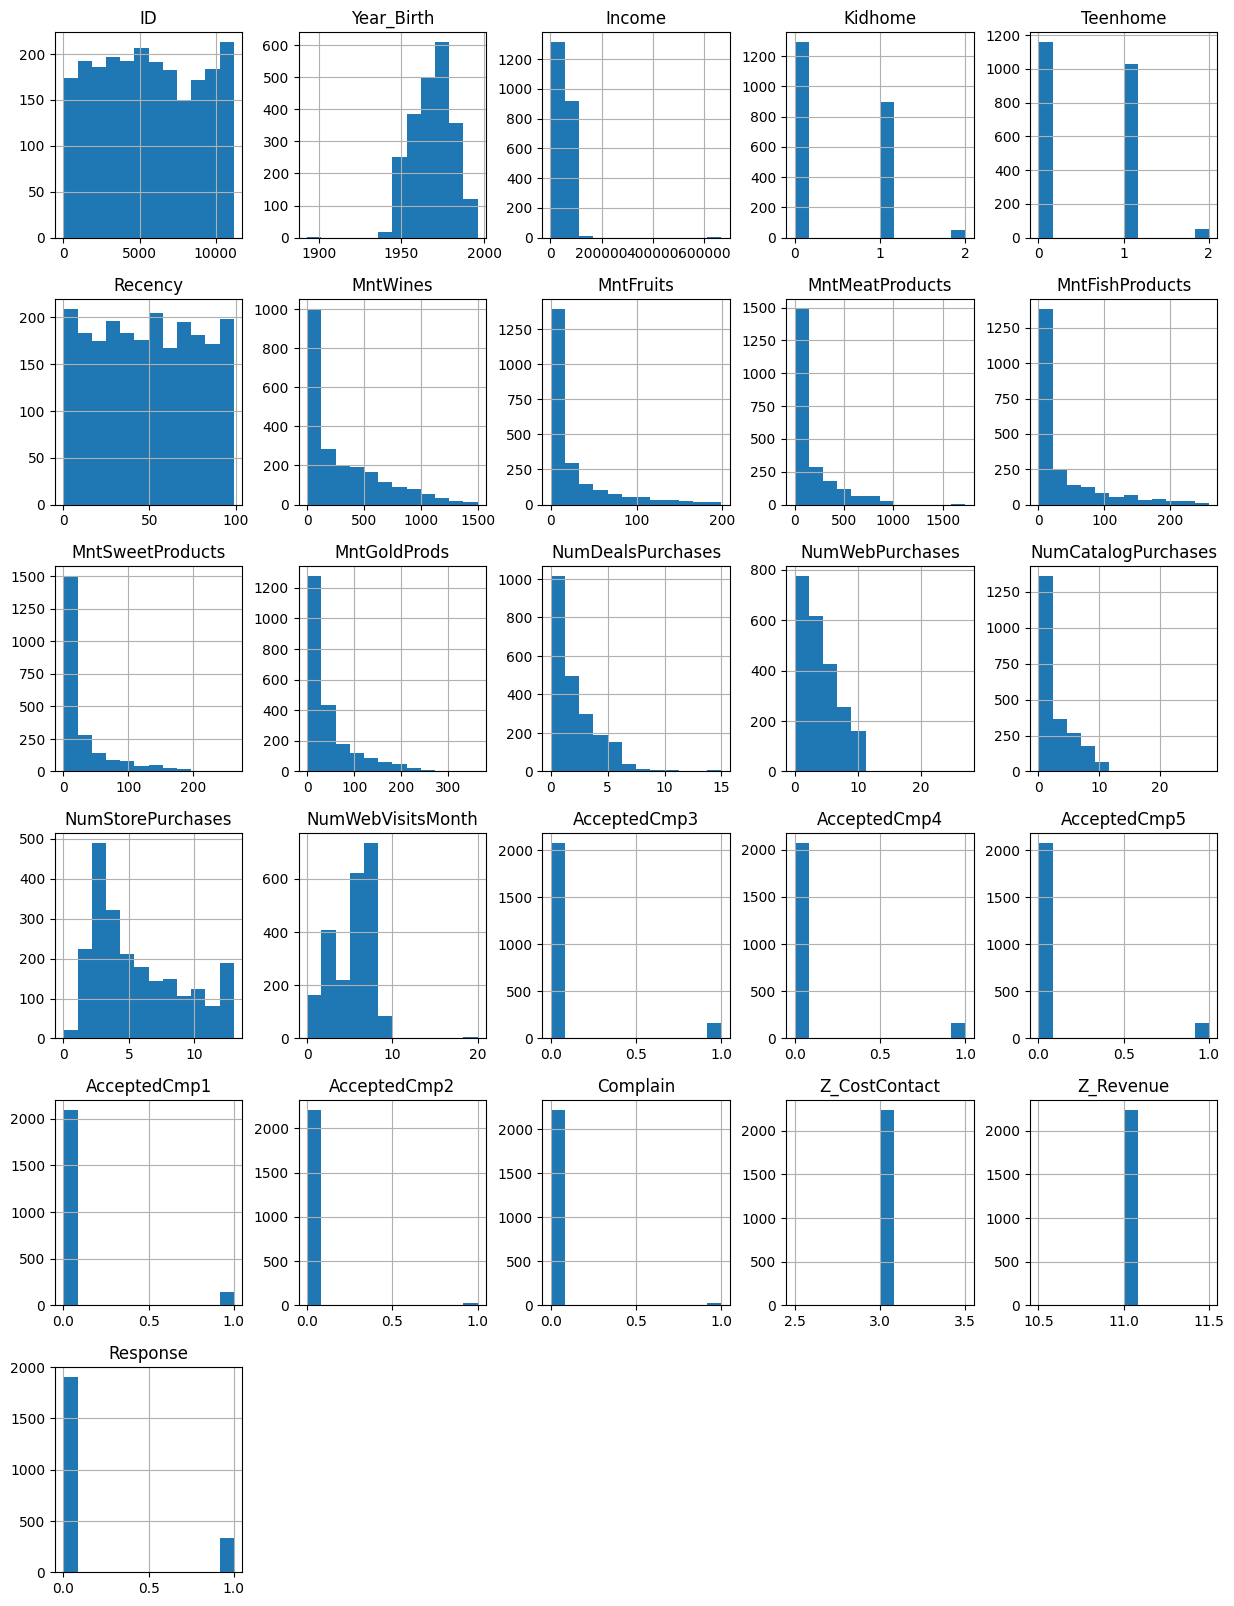

In [71]:
import matplotlib.pyplot as plt
marketing.hist(bins=12, figsize=(15, 20))
plt.show()


The ID is typically sequential and is presented here with a uniform distribution.
The heat map of birth years ranges from 1940 to 1990, with the highest number of buyers born around 1965. This point is helpful in analyzing the generations of customers to devise appropriate marketing strategies.
The third is an income histogram, with the average income between 0 and 1800, most customers have lower incomes. This indicates that this marketing strategy is more attractive to people with lower incomes.
The fourth and fifth is about the children or teenager number in the customer's family. The most customers have one child, followed by two children, and almost no family has more than two children. This may be due to their low income. The amount of children will affected how they buy products
The recency histogram recency histogram shows the frequency of customer purchases. The highest frequency is for single-digit numbers of purchases, followed by about 50 customers who have made over 200 purchases, and all customers have made more than 150 purchases.
The Mnt charts display the amount spent on different categories of products over the past 2 years, which can help identify which categories of products are more popular.
The NumDealsPurchases histogram shows the number of purchases per order, which helps to analyze whether customers prefer to shop online, in stores, or on websites.
 For the CMP ones, each bar chart represents a marketing campaign. The graph shows most of the customers did not take up the offer of a marketing campaign suggests that the customer base is highly selective or that the targeting of marketing campaigns could be improved.
 Regarding the complain histogram, almost all customers did not report a complaint, which could suggest high customer satisfaction.
Z_CostContact and Z_Revenue are standardized values for cost per contact and revenue, which might be used for internal benchmarking or performance monitoring.
The last one represents the response to the last campaign, which can be crucial for evaluating the effectiveness of marketing strategies.

<Axes: xlabel='Education'>

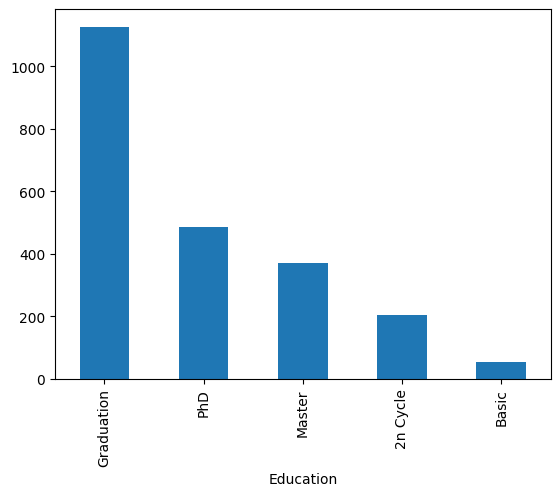

In [ ]:
marketing['Education'].value_counts().plot(kind='bar')

From the bar chart, most of the customers are graduation, the following customers are PHDs, the third number of customers are masters and 2n cycle and people who receive basic education. This suggest that the dataset contains information from a fairly well-educated population, with most having at least a graduation level of education, which is helpful for making some marketing strategies based on the well-educated population. 

Insert your explanations and interpretations here. You may use multiple cells if you wish.

## Task 2 (1 point): Drop all columns that have constant values.

In [ ]:

nunique = marketing.nunique()
constant_columns = nunique[nunique == 1].index
marketing.drop(columns=constant_columns, inplace=True)

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [ ]:
marketing['In_Relationship'] = marketing['Marital_Status'].apply(lambda x: 1 if x in ["Married", "Together"] else 0)
marketing.drop(columns='Marital_Status', inplace=True)


## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [68]:

median_income = marketing['Income'].median()
print("Median income:", median_income)

missing_before = marketing['Income'].isnull().sum()
marketing['Income'].fillna(median_income, inplace=True)
missing_after = marketing['Income'].isnull().sum()

print("Number of missing values before imputation:", missing_before)
print("Number of missing values after imputation:", missing_after)


Median income: 51381.5
Number of missing values before imputation: 24
Number of missing values after imputation: 0


This output means that initially, there were 24 missing values in the Income column of your dataset. After imputing these missing values using the median income value, which was calculated to be 51381.5$. This income data doesn't contain many outliers, and the missing values are random, the median is quite a reliable value for imputation. 

The median is a robust measure of central tendency that is not affected by outliers or a skewed distribution of data. It represents the middle value when all income figures are sorted in ascending order. By using the median to impute missing values, I have filled in the missing data points with a value that reflects the central tendency of the Income variable without being overly influenced by extreme values.As such, it could be used for analyze.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [73]:
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Create the 'In_Relationship' column where 1 indicates 'Married' or 'Together', and 0 otherwise
marketing['In_Relationship'] = marketing['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)


X = marketing[['Income', 'In_Relationship']]
y = marketing['MntWines']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 263.61704688252837


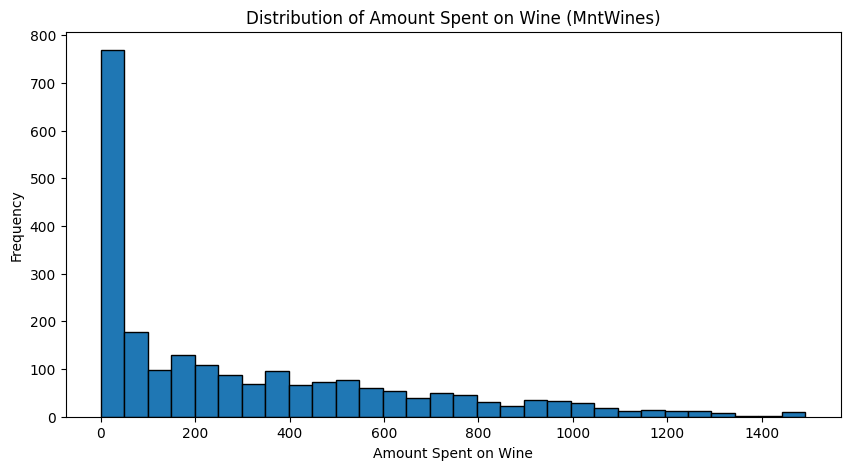

The RMSE is 86.74% of the average wine spending.
The RMSE is 151.94% of the median wine spending.


In [75]:
# Summarize MntWines
summary_stats = marketing['MntWines'].describe()

# Visualize MntWines
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(marketing['MntWines'], bins=30, edgecolor='k')
plt.title('Distribution of Amount Spent on Wine (MntWines)')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Frequency')
plt.show()

# Compare RMSE to Summary Statistics
mean_spending = summary_stats['mean']
median_spending = summary_stats['50%']
rmse = 263.62

print(f"The RMSE is {rmse/mean_spending:.2%} of the average wine spending.")
print(f"The RMSE is {rmse/median_spending:.2%} of the median wine spending.")


 An RMSE that is 86.74% of the average spending on wine suggests that the model's predictions can be off by nearly the same amount as the average spending itself on a typical prediction. This indicates a considerable error margin relative to what an average customer spends on wine. The RMSE exceeds the median spending by over 50%, meaning the prediction error is larger than what over half of the customers spend on wine. This scenario points to a very high prediction error relative to the actual spending behaviors of a significant portion of customers.

The model appears to have huge limitations in accurately predicting the amount spent on wine. With such a high RMSE relative to both the average and median spending levels, the reliability of the model's predictions for decision-making or insights is significantly compromised.The high RMSE suggests that there is considerable room for improvement in the model.  It's essential to evaluate these findings within the broader context of analysis objectives by connecting with personalized marketing campaigns, the current model may not meet the necessary standards of performance. 


## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 3 clusters using average linkage based on PCA projections of the original data onto 4 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 4 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 5 clusters.  Compare the results to the 3 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


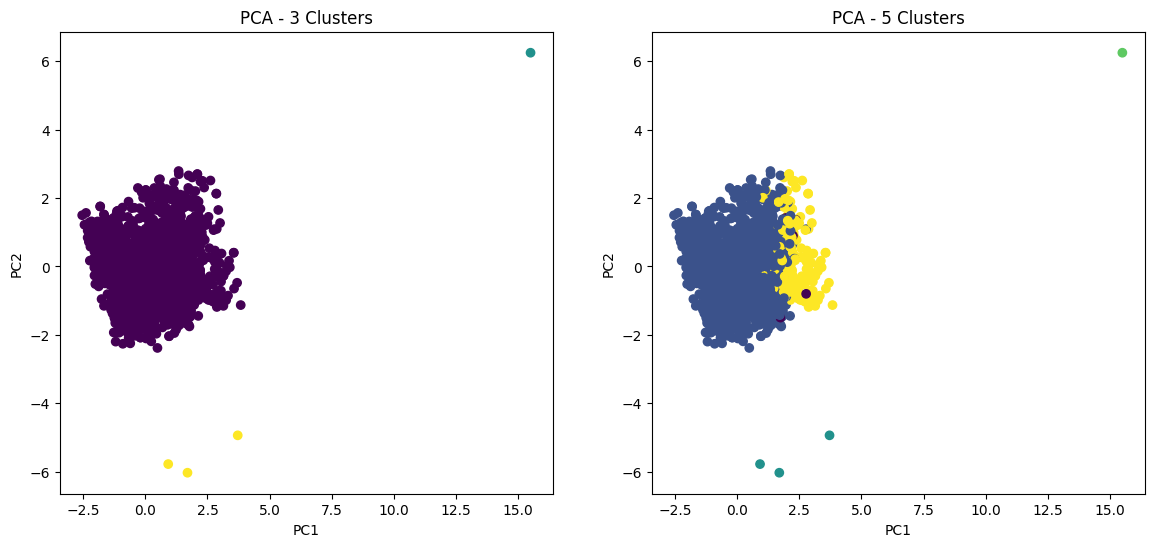

In [90]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from scipy.sparse import csr_matrix

# Preprocessing steps
categorical_features = ['Education', 'Marital_Status']
numerical_features = ['Year_Birth', 'Income', 'MntWines']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# PCA
pca = PCA(n_components=4)

# Agglomerative Clustering
cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')

# Processing pipeline
preprocessed_data = preprocessor.fit_transform(marketing)
pca_data = pca.fit_transform(preprocessed_data)

# Clustering
labels_3 = cluster_3.fit_predict(pca_data)
labels_5 = cluster_5.fit_predict(pca_data)

# Report the percentage of variance retained in the first 4 principal components.
variance_retained = np.sum(pca.explained_variance_ratio_) * 100

# Scatter plot for 3 clusters
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_3)
plt.title('PCA - 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Scatter plot for 5 clusters
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_5)
plt.title('PCA - 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

For the graph PCA - 3 Clusters,most data points are densely packed within a main cluster with three outliers that are distinctly separate. The outliers may represent unique customer segments with specific characteristics that differ significantly from the main group.
For the PCA - 5 Clusters,  When increasing the clusters to five, we see that the main cluster from the 3-cluster solution is now divided into three distinct groups (blue, yellow, and purple), with two additional outlier clusters (cyan and green).


3 Clusters one gives us a very broad categorization of the customers with a main group and some outliers. This might be beneficial if the outliers are very specific high-value customer segments, but it does not offer detailed segmentation. While the 5 Clusters one provides more granularity by dividing the main group further. This might reveal more nuanced differences between customers, which could be used to make targeted marketing strategies.

I perfer the 5-cluster solution, which will be more effective if the goal is to identify and understand nuanced customer behaviors for more targeted engagement strategies. 

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 2-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wangqirong/Docu

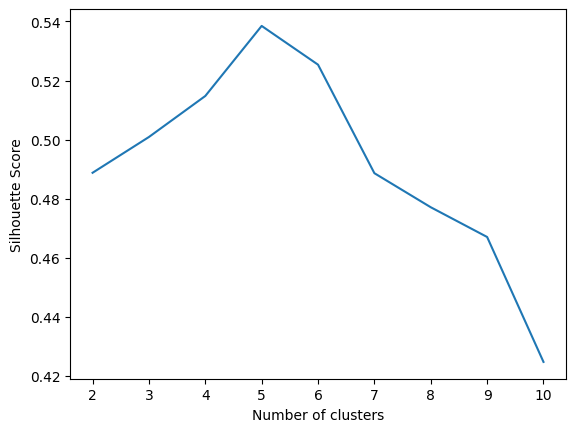

In [94]:
# using ChatGPT here
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


marketing_encoded = pd.get_dummies(marketing, drop_first=True)

# Scale the data
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(marketing_encoded)

# Apply PCA
pca = PCA(n_components=2)
marketing_pca = pca.fit_transform(marketing_scaled)

# Find optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_pca)
    silhouette_scores.append(silhouette_score(marketing_pca, kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



From the plot, it looks like the score is highest when the number of clusters is 3, indicating that 3 is the optimal number of clusters for this dataset, according to the silhouette method. This is under the assumption that after the number of clusters, the score decreases or does not show significant improvement.


Cluster 1 shows where the silhouette score peaks, suggesting that the clusters formed here are well-separated and dense. The data points within these clusters are, on average, closer to their own cluster center than to others. The customers in this cluster are likely to be the most distinct and could represent clear market segments.As the number of clusters increases beyond 3, the silhouette scores decrease, indicating that the additional clusters may not be as well defined. The decrease suggests that customers in these additional clusters are not as tightly grouped or that the clusters are not as distinct from each other.


In [95]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Run KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

numeric_cols = marketing.select_dtypes(include=['number']).columns.tolist()

# First, ensure 'Cluster' is indeed a column. If it's not, this step corrects that.
if 'Cluster' not in marketing.columns:
    marketing.reset_index(inplace=True)

# Select only numeric columns but keep 'Cluster' for grouping
numeric_columns = marketing.select_dtypes(include=['number']).columns.difference(['Cluster'])  # Exclude 'Cluster' for calculation
cluster_characteristics = marketing.groupby('Cluster')[numeric_columns].mean()

# Now display the characteristics of each cluster
print(cluster_characteristics)

         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                         
0            0.228723      0.053191      0.101064      0.148936      0.276596   
1            0.002845      0.002845      0.062589      0.017070      0.000000   
2            0.021583      0.011990      0.055156      0.107914      0.011990   
3            0.000000      0.000000      0.085213      0.005013      0.000000   
4            0.028708      0.009569      0.062201      0.148325      0.009569   
5            0.259259      0.033951      0.092593      0.151235      0.320988   

         Complain           ID  In_Relationship        Income   Kidhome  ...  \
Cluster                                                                  ...   
0        0.005319  5441.872340         0.005319  77244.276596  0.015957  ...   
1        0.009957  5612.834993         0.997155  35540.312945  0.796586  ...   
2        0.014388  5629.249400 

Cluster 0:
High acceptance rates for marketing campaigns, particularly campaign 5.Very low complaint rates.
High average income.Low number of children at home.High number of store and web purchases, but low number of deals purchases.
This cluster represents affluent, engaged customers who respond well to marketing campaigns and prefer non-discounted purchases. They have the financial capability to shop without looking for deals and seem to be satisfied customers with very few complaints.

Cluster 1:
Extremely low acceptance rates for marketing campaigns.Average complaint rate.
Lowest average income.High number of children at home.Low number of store and web purchases and higher reliance on deals.
This cluster appears to represent price-sensitive customers with limited disposable income, perhaps younger families or customers in a lower income bracket. They're less responsive to marketing campaigns and tend to purchase items on deals.

Cluster 2:
Moderate acceptance rates for marketing campaigns.Average complaint rate.Middle-range income.Moderate number of children at home.
High number of web purchases and deals.
These customers are moderately engaged with campaigns and show a mixed shopping behavior with a tendency to look for deals online. They have an average income and might represent the middle-class segment.

Cluster 3:
Low acceptance rates for marketing campaigns, with a small response to campaign 3.Average complaint rate.Low income.High number of children at home.Low number of store and web purchases, moderate reliance on deals.
Similar to Cluster 1, these customers are also price-sensitive but seem to be slightly more responsive to campaign 3. They may be looking for specific deals that cater to families.

Cluster 4:
Low acceptance rates for marketing campaigns, with some response to campaign 4.Very low complaint rates.Middle-range income.Low number of children at home.Moderate number of store and web purchases, higher number of catalog purchases, and moderate reliance on deals.
This cluster represents an average-income group that is quite responsive to catalog marketing and prefers a mix of shopping channels.

Cluster 5:
High acceptance rates for all campaigns, particularly campaigns 5 and 1.No complaints.High income.Low number of children at home.High number of store and web purchases, and the highest number of catalog purchases, with low reliance on deals.
This segment is the most premium, with no complaints, high income, and the highest engagement across all marketing campaigns. They enjoy shopping across all channels and are the least price-sensitive.

Given the available data, K-means clustering seems to be the better method due to the following reasons:

Clear segmentation: The cluster means indicate clear differences in behavior and demographics that can be directly translated into targeted marketing strategies.

Actionability: K-means provides distinct groups that are easier to address with specific marketing tactics.

Scalability and efficiency: If the dataset is large, K-means is more computationally efficient, making it more suitable for repeated analysis and real-time segmentation.

I prefer K-means clustering. Based on the output, K-means clustering would likely be preferred for creating marketing strategies because of its simplicity, clarity, and the actionable nature of the resulting customer segments. The ability to identify and target specific groups within the customer base aligns well with the objective of optimizing marketing efforts. 

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [105]:
# Preprocess the data
df_processed = preprocessor.fit_transform(marketing)

# Show the shape of the processed data to understand how many features we have now
df_processed.shape

(2240, 34)

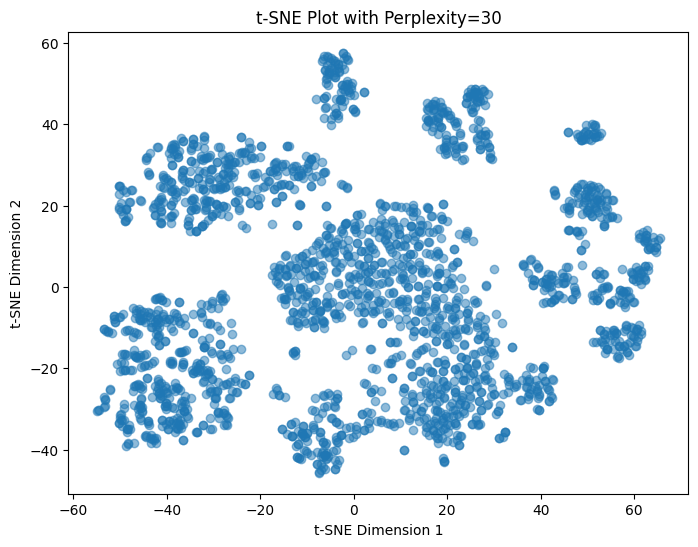

In [107]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(df_processed)

# Plotting the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Plot with Perplexity=30')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

From the plot, we can distinguish several groups. Clusters are regions where points are more densely packed. These could represent different customer segments.



/Users/wangqirong/Documents/umich/courses-2024spring/SI618/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


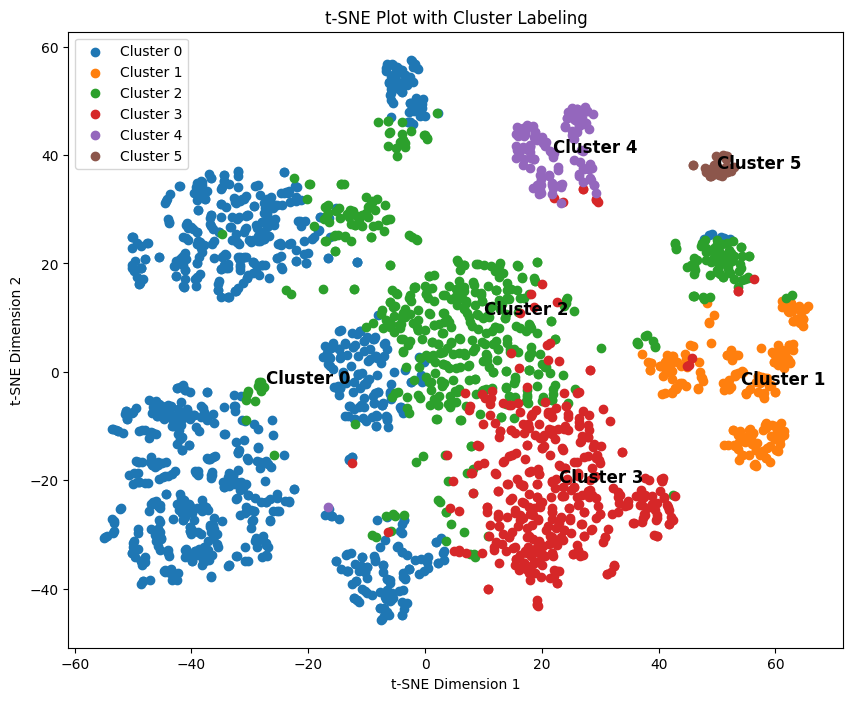

In [110]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
number_of_clusters = 6  
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_processed)

# Calculate cluster centroids in the t-SNE space for annotation purposes
centroids = np.array([tsne_results[cluster_labels == i].mean(axis=0) for i in range(number_of_clusters)])

# Create the t-SNE plot with labeled clusters
plt.figure(figsize=(10, 8))
for i in range(number_of_clusters):
    # Scatter plot for each cluster
    plt.scatter(tsne_results[cluster_labels == i, 0], tsne_results[cluster_labels == i, 1], label=f'Cluster {i}')

    # Annotate the centroid if desired (optional)
    plt.text(centroids[i, 0], centroids[i, 1], f'Cluster {i}', fontdict={'weight': 'bold', 'size': 12})

# Add plot title and labels
plt.title('t-SNE Plot with Cluster Labeling')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()  # Show legend with cluster labels
plt.show()

Cluster 0 (Blue):
Characteristics: Affluent, engaged customers with high average income and low complaint rates, who prefer full-priced items.
t-SNE Visualization: Cluster 0 is somewhat spread out and separated from other clusters, which may represent the distinct purchasing patterns and higher income level of this segment.

Cluster 1 (Orange):
Characteristics: Price-sensitive customers with the lowest average income, high number of children, and a preference for deals.
t-SNE Visualization: This cluster is tightly grouped and distant from clusters of higher-income segments, underscoring their distinct behavioral pattern likely influenced by budget constraints.

Cluster 2 (Green):
Characteristics: Middle-class segment with moderate engagement in campaigns and a mixed shopping behavior with a tendency to look for deals online.
t-SNE Visualization: A moderate spread of points suggests varied behavior within this segment, and its central placement among clusters indicates some overlap with behaviors from both higher and lower-income groups.

Cluster 3 (Red):
Characteristics: Price-sensitive, similar to Cluster 1 but with some responsiveness to campaign 3, indicating specific deal-seeking behavior.
t-SNE Visualization: This cluster is close to Cluster 1, which is intuitive as both represent price-sensitive groups, but with slight separation perhaps due to the distinct response to campaign 3.

Cluster 4 (Purple):
Characteristics: Average income, lower complaint rates, and a balanced mix of shopping channels, with a notable response to catalog marketing.
t-SNE Visualization: Cluster 4 is positioned somewhat in between the high and low-income clusters, signifying its middle-ground status in terms of income and shopping behavior.

Cluster 5 (Brown):
Characteristics: The most premium segment, highly engaged with marketing campaigns, no complaints, and high income, indicating luxury consumer behavior.
t-SNE Visualization: This cluster is isolated from the others, especially from the price-sensitive clusters, highlighting the unique and distinguished behavior of this group.


These clusters are visible in the plot and are well-separated, each occupying its own region of the t-SNE space, which suggests that the t-SNE model has successfully captured the significant differences between customer segments. 

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.